## PART 04-1) Pandas Part 1
- https://pandas.pydata.org/pandas-docs/stable/reference/index.html

In [10]:
a = list("ABC")
b = [1,2,3]

#zip(a, b) => ('A', 1), ('B', 2), ('C', 3)

for idx, x in enumerate(zip(a, b), start=100):
    print(idx, x)

100 ('A', 1)
101 ('B', 2)
102 ('C', 3)


## 0.Ready

In [ ]:
# google drive mount 방법
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# current working directory 변경 방법
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/data')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
import pandas as pd
import numpy as np
import shelve

## 0.Pandas 특징
- DataFrame, Series, Index 등의 객체를 사용하여 데이터 처리 및 분석을 수행한다
- ndarray를 기반으로 데이터의 처리, 분석을 효율적으로 할 수 있다
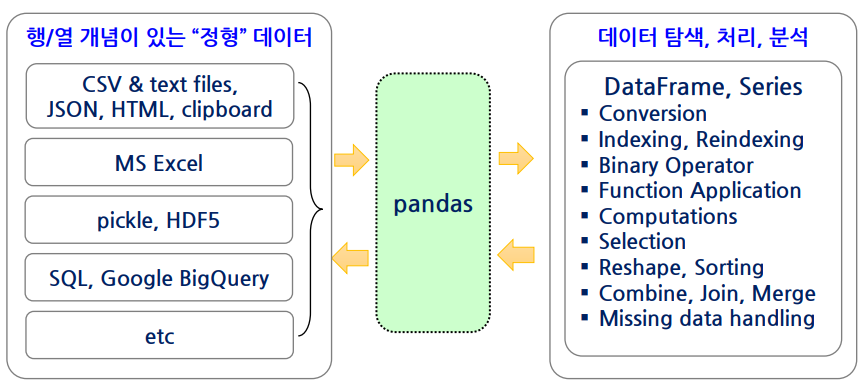

## 1.DataFrame, Series 구성요소 및 속성
- pandas의 Data Structure
- iterable 컨테이너
- Series는 스칼라 데이터를 위한, DataFrame은 Series를 위한 컨테이너
- index, columns는 Index 타입
- axis = 0 대신 axis='index, axis = 1 대신 'columns'로 사용할 수 있음

### 1-01. csv, xlsx 파일을 DataFrame으로 읽어오기
- https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

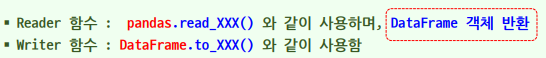

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# easySample.csv 파일을 읽어 DataFrame 객체 반환
data = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/data/main/easySample.csv')
display(type(data), data)

pandas.core.frame.DataFrame

,ID,pname,birth,dept,english,japanese,chinese
0,18030201,James Kim,1990-01-23,Education,1.0,1.0,NaN
1,18030202,Rose Hwang,1992-10-11,Marketing,NaN,2.0,NaN
2,19030401,Sam Park,1995-07-02,Education,1.0,NaN,NaN
3,19070101,Chris Jang,1990-11-23,Education,NaN,NaN,3.0
4,19070102,Grace Lee,1993-02-01,Marketing,NaN,NaN,NaN
5,19070103,Juile Yoon,1992-07-16,Education,NaN,NaN,1.0


In [ ]:
index  Index (type)

In [ ]:
# ../  : 상위 디렉터리
# ./ : 현재 디렉터리
# name/ : 하위 디렉터리
data = pd.read_csv('../data/easySample.csv', index_col='ID')
data.head(2)

In [ ]:
# easySample_woHeader.csv 파일을 읽어 DataFrame 객체 반환
# header가 존재하지 않으므로 header를 지정한다
   # names = ['ID','name','birth','dept','english','japanese','chinese']
# index_col을 사용하여 index를 'ID'로 지정한다
data = pd.read_csv('easySample_woHeader.csv',
                   header = None,
                   names = ['ID','name','birth','dept','english','japanese','chinese'],
                   index_col = 'ID')
data

In [ ]:
# 엑셀 파일을 읽어 DataFrame 객체 반환
# index_col 지정시 column 번호를 사용하거나 lable을 사용할 수 있음
# sheet_name : 특정 sheet의 내용을 가져오기 위해 사용
# encoding : 한글을 깨지지 않게 가져오기 위해 사용
data = pd.read_excel('easySample.xlsx', index_col=0, encoding='cp949')     # encoding='utf-8'
data

In [ ]:
# farm_data 디렉터리에 있는 일일수급상황_2019.xlsx 파일을 DataFrame으로 읽어 10개의 행만 출력하여 보자




### 1-02. DataFrame 구성요소
- 2차원의 테이블 형식의 배열
- 여러 개의 Series로 구성된 Data Table
- 하나의 열은 동일 타입 데이터(Homogeneous data)로 구성함
- 서로 다른 열은 다른 타입의 데이터(Heterogeneous data)로 구성 가능함
- 구성요소 : index, columns, values

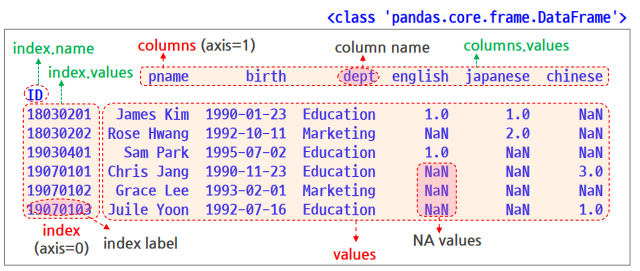

In [ ]:
data.columns.values

array(['ID', 'pname', 'birth', 'dept', 'english', 'japanese', 'chinese'],
      dtype=object)

In [ ]:
# easySample.csv 파일을 읽어 DataFrame 객체 반환
data = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/data/main/easySample.csv')
display(type(data), data)

pandas.core.frame.DataFrame

,ID,pname,birth,dept,english,japanese,chinese
0,18030201,James Kim,1990-01-23,Education,1.0,1.0,NaN
1,18030202,Rose Hwang,1992-10-11,Marketing,NaN,2.0,NaN
2,19030401,Sam Park,1995-07-02,Education,1.0,NaN,NaN
3,19070101,Chris Jang,1990-11-23,Education,NaN,NaN,3.0
4,19070102,Grace Lee,1993-02-01,Marketing,NaN,NaN,NaN
5,19070103,Juile Yoon,1992-07-16,Education,NaN,NaN,1.0


In [ ]:
# DataFrame 구성요소 및 type 출력해보기
#  - index, columns, values
#  - df.index(row), df.columns(column) => Index type, DataFrame은 2개의 Index 사용
#  - df.values => ndarray type

In [ ]:
# data의 index를 출력하여 본다


Int64Index([18030201, 18030202, 19030401, 19070101, 19070102, 19070103], dtype='int64', name='ID')

In [ ]:
# data의 index의 values를 출력하여 본다.


array([18030201, 18030202, 19030401, 19070101, 19070102, 19070103])

In [ ]:
# data의 columns를 출력하여 본다


Index(['pname', 'birth', 'dept', 'english', 'japanese', 'chinese'], dtype='object')

In [ ]:
# data의 columns의 values를 출력하여 본다


array(['pname', 'birth', 'dept', 'english', 'japanese', 'chinese'],
      dtype=object)

In [ ]:
# data의 values를 출력하여 본다


array([['James Kim', '1990-01-23', 'Education', 1.0, 1.0, nan],
       ['Rose Hwang', '1992-10-11', 'Marketing', nan, 2.0, nan],
       ['Sam Park', '1995-07-02', 'Education', 1.0, nan, nan],
       ['Chris Jang', '1990-11-23', 'Education', nan, nan, 3.0],
       ['Grace Lee', '1993-02-01', 'Marketing', nan, nan, nan],
       ['Juile Yoon', '1992-07-16', 'Education', nan, nan, 1.0]],
      dtype=object)

In [ ]:
# index, columns, index.name 은 대입문을 사용하여 변경 가능
# 단, 개수가 같아야 함
len(data.index), len(data.columns)

(6, 7)

In [ ]:
# 아래와 같은 DataFrame이 되도록 index, columns, index.name을 수정하여 본다

data.index = list("ABCDEF")
data.columns = list('abcdefg')
data.index.name = 'my_index'
data


,a,b,c,d,e,f,g
my_index,,,,,,,
A,18030201,James Kim,1990-01-23,Education,1.0,1.0,NaN
B,18030202,Rose Hwang,1992-10-11,Marketing,NaN,2.0,NaN
C,19030401,Sam Park,1995-07-02,Education,1.0,NaN,NaN
D,19070101,Chris Jang,1990-11-23,Education,NaN,NaN,3.0
E,19070102,Grace Lee,1993-02-01,Marketing,NaN,NaN,NaN
F,19070103,Juile Yoon,1992-07-16,Education,NaN,NaN,1.0


### 1-03. Series 구성요소
- 1차원의 동일 타입 데이터로 구성된 배열
- 구성요소 : index, values

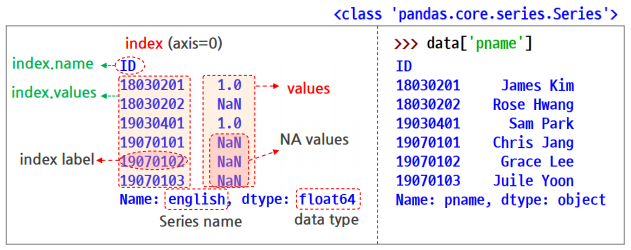

In [18]:
# easySample.csv를 DataFrame으로 읽어 온다, index_col을 0으로 지정한다.
# DataFrame의 이름을 data라고 한다
data = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/data/main/easySample.csv',
                   index_col = 0)
display(type(data), data)
# data의 columns를 출력해 본다
display(data.columns,data.index)

pandas.core.frame.DataFrame

,pname,birth,dept,english,japanese,chinese
ID,,,,,,
18030201,James Kim,1990-01-23,Education,1.0,1.0,NaN
18030202,Rose Hwang,1992-10-11,Marketing,NaN,2.0,NaN
19030401,Sam Park,1995-07-02,Education,1.0,NaN,NaN
19070101,Chris Jang,1990-11-23,Education,NaN,NaN,3.0
19070102,Grace Lee,1993-02-01,Marketing,NaN,NaN,NaN
19070103,Juile Yoon,1992-07-16,Education,NaN,NaN,1.0


Index(['pname', 'birth', 'dept', 'english', 'japanese', 'chinese'], dtype='object')

Int64Index([18030201, 18030202, 19030401, 19070101, 19070102, 19070103], dtype='int64', name='ID')

In [24]:
# data에서 'english' column을 indexing 하여 Series를 생성하여 eng 라는 이름을 부여한다
# indexing
eng = data['pname']
eng

ID
18030201     James Kim
18030202    Rose Hwang
19030401      Sam Park
19070101    Chris Jang
19070102     Grace Lee
19070103    Juile Yoon
Name: pname, dtype: object

In [25]:
# eng의 index, values 구성요소를 출력해 본다
display(eng.index)  # read/write
display(eng.values) # read only

Int64Index([18030201, 18030202, 19030401, 19070101, 19070102, 19070103], dtype='int64', name='ID')

array(['James Kim', 'Rose Hwang', 'Sam Park', 'Chris Jang', 'Grace Lee',
       'Juile Yoon'], dtype=object)

In [27]:
# eng의 index의 values를 출력해 본다
display(eng.index.values) # read only

array([18030201, 18030202, 19030401, 19070101, 19070102, 19070103])

### 1-04. Index 객체 
- pandas.Index의 subclass 임
- Index에 포함된 값에 따라 그 타입이 달라짐
- Index.name = 'index이름'으로 이름을 부여/변경할 수 있음
- index, columns의 value를 변경할 때는 df.rename 메서드를 사용함
- 빠른 선택과 정렬을 위해 해시 테이블을 사용해 구현됨
- 데이터 중복이 허용되지만, 데이터가 중복되면 객체 접근이 느려짐
- Index가 정렬되어 있는 것이 indexing, selection 작업시 편리함


In [ ]:
# RangeIndex 객체 생성
a = pd.RangeIndex(10)  # range(start, stop, step)
b = pd.RangeIndex(10000)
import sys
display(sys.getsizeof(a), sys.getsizeof(b))

152

152

In [ ]:
display(a, b)

RangeIndex(start=0, stop=10, step=1)

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
# index_col을 별도로 지정하지 않은 경우의 index를 확인하여 보자
df1 = pd.read_csv('easySample.csv')
df1.index

In [ ]:
# index_col을 'ID'로 지정하고 index를 확인하여 보자
df2 = pd.read_csv('easySample.csv')
df2.index

In [ ]:
# index_col을 'pname'으로 지정하고 index를 확인하여 보자
df3 = pd.read_csv('easySample.csv')
# dtype = 'object' (문자열 취급)
df3.index

In [ ]:
# index_col 을 'birth'로 지정하고 index를 확인하여 보자
df4 = pd.read_csv('easySample.csv')
df4.index = pd.to_datetime(df4.index)
df4.index

In [ ]:
# 모든 index 타입은 Index 타입의 subclass 이다 (즉, 기본 특성은 같다)
print(issubclass(pd.Int64Index, pd.Index))
print(issubclass(pd.RangeIndex, pd.Index))
print(issubclass(pd.DatetimeIndex, pd.Index))

### 1-05. dtype에 따른 메모리 사용
- 올바른 dtype의 중요성
  1. 적합한 연산, 메서드 사용을 할 수 있음
  2. 메모리의 사용을 절약할 수 있음 (int8, int16, int32, int64)
- dtype 변경
  - https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html 
  - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
  - https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
  - https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html

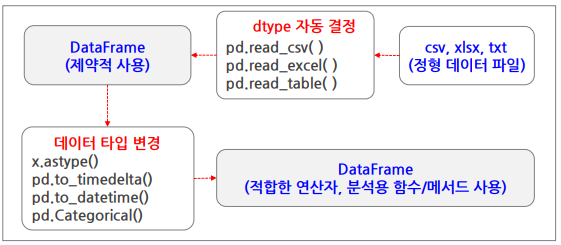

In [ ]:
data = pd.read_csv('easySample.csv', index_col='ID')
print(data.columns)
#data = data[['pname', 'birth', 'dept']]    
print(data.dtypes, end='\n\n')

Index(['pname', 'birth', 'dept', 'english', 'japanese', 'chinese'], dtype='object')
pname        object
birth        object
dept         object
english     float64
japanese    float64
chinese     float64
dtype: object



In [ ]:
# data의 index의 dtype을 출력해 본다
print(data.index.dtype)

# data가 메모리를 얼마나 사용하는지 memory_usage를 사용하여 출력한다, 
# 이때 index를 포함하고, deep=True로 해서 메모리 사용량을 구한다.
print(data.memory_usage(     ), end='\n\n')

int64
Index        48
pname       398
birth       402
dept        396
english      48
japanese     48
chinese      48
dtype: int64



In [ ]:
# 'dept'에 대해서 astype()를 사용하여 'category' 타입으로 변경한다


# 'birth'에 대해서pd.to_datetime()을 사용하여 datetime 타입으로 변경한다 


'''
data['english'] = data['english'].astype('float32')
data['japanese'] = data['japanese'].astype('float32')
data['chinese'] = data['chinese'].astype('float32')
'''
# 'english':'chinese'에 대해서 astype을 사용하여 float32로 타입을 변경한다


# data에 있는 모든 columns에 대해 dtype을 확인한다
print(, end='\n\n')

# data의 각 columns별 메모리 사용량을 확인한다.index=False, deep=True을 사용한다
print()

pname               object
birth       datetime64[ns]
dept              category
english            float32
japanese           float32
chinese            float32
dtype: object

pname       398
birth        48
dept        218
english      24
japanese     24
chinese      24
dtype: int64


In [ ]:
# csv로 저장하면 dtype이 유지되지 않을 수 있다
# datetime, categoty 등이 object로 저장되었다
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
data.to_csv('mydata.csv')
dfx = pd.read_csv('mydata.csv', index_col = 'ID')
dfx

,pname,birth,dept,english,japanese,chinese
ID,,,,,,
18030201,James Kim,1990-01-23,Education,1.0,1.0,NaN
18030202,Rose Hwang,1992-10-11,Marketing,NaN,2.0,NaN
19030401,Sam Park,1995-07-02,Education,1.0,NaN,NaN
19070101,Chris Jang,1990-11-23,Education,NaN,NaN,3.0
19070102,Grace Lee,1993-02-01,Marketing,NaN,NaN,NaN
19070103,Juile Yoon,1992-07-16,Education,NaN,NaN,1.0


In [ ]:
# dfx의 column 별 데이터 타입 확인


pname        object
birth        object
dept         object
english     float64
japanese    float64
chinese     float64
dtype: object

In [ ]:
# dtype을 유지하면서 파일로 저장하기!
# shelve 바이너리로 파일 저장
import shelve
with shelve.open('mySample') as ms :
  # mySample 파일에 'sample'을 key로 하여 data를 저장
  ms['sample'] = data 
print("Done save DataFrame")

Done save DataFrame


In [ ]:
import shelve
with shelve.open('mySample') as ms :
  # mySample에 'sample'을 key로 하여 저장된 객체 가져오기
  dfx = ms['sample'] 

print(dfx.dtypes)

pname               object
birth       datetime64[ns]
dept              category
english            float32
japanese           float32
chinese            float32
dtype: object


In [ ]:
# 'easySampleLong.csv'를 읽어 shape, dtypes, memory_usage를 확인한다
data = pd.read_csv('easySampleLong.csv', index_col='ID')
#data = data[['pname', 'birth', 'dept']] 
print(data.shape)

# data의 각 column의 dtype을 확인한다.
print(data.dtypes, end='\n\n')

# data의 메모리 사용량을 확인한다 (index=False, deep=True) 사용
print(data.memory_usage(index=False, deep=True), end='\n\n')

(1000, 3)
pname    object
birth    object
dept     object
dtype: object

pname    66364
birth    67000
dept     66000
dtype: int64



In [ ]:
# data의 'dept'에 대해서 astype()를 사용하여 'category' 타입으로 변경한다
data['dept']  = data['dept'].astype('category')

# data의 'birth'에 대해서pd.to_datetime()을 사용하여 datetime 타입으로 변경한다 
data['birth'] = pd.to_datetime(data['birth'])

# data의 각 column의 dtype을 확인한다.
print(data.dtypes, end='\n\n')

# data의 메모리 사용량을 확인한다 (index=False, deep=True) 사용
print(data.memory_usage(index=False, deep=True))

pname            object
birth    datetime64[ns]
dept           category
dtype: object

pname    66364
birth     8000
dept      1212
dtype: int64


### 1-06. Exercise_01
- easySample2 => shelve 바이너리 파일
- 다음의 링크로 가서 직접 작성하여 보도록 합니다.
- https://colab.research.google.com/drive/1p_VzsmkG5xvLcT-qRPyDMLYCYvxWnrUt
- easySample2.csv 파일을 열어, dtype을 올바르게 정리한다
- shelve 바이너리 파일로 저장 (파일이름 'mySample')
- 'sample3' key로 정리된 DataFrame 저장

해답은 있습니다!  (그러나 풀이 "도전"부터 해주세요!)
- https://colab.research.google.com/drive/1lbrc9CPvE6MhHmL3Te5iBeqLEegJZTmC


## 2.Series 생성, 메서드, 연산

In [ ]:
list( range(10) )

In [ ]:
pd.Series([1, 2, 3])

### 2-01. Series 생성
- pd.Series(data=None, index=None, dtype=None, name=None, copy=False, ... )
- 1) data : array-like, iterable, dict or scalar value 등을 사용할 수 있음
- 2) index : array-like or Index (1D)
   - index.values 는 hashable 객체이어야 하며, data와 같은 길이어야 함 
   - 생략 시 RangeIndex가 사용됨 (0 부터 1씩 증가하는 숫자 values)
   - data가 dict 객체일때 index가 생략되면, dict 객체의 key를 index로 사용
   - dict 객체의 key와 index가 중복되면 index를 따름 (dict의 key가 갱신 됨) 
- 3) dtype : Series.values 의 데이터 타입
   - str, numpy.dtype, ExtensionDtype 등을 사용할 수 있음
- 4) name : Series.name으로 사용할 것으로 문자열로 지정함
- 5) copy : 입력 데이터를 복사하는지에 대한 여부 (ndarray 에만 적용)
   - True 인 경우 복사(다른 메모리 사용), False라도 dtype이 다르면 복사함

In [28]:
import pandas as pd
import numpy as np

def printobj(*a):
    for x in a:
        print(x)
        print('-'*20)

In [31]:
score  = (80, 90, 100, 95)
name   = ["Kim", "Yoon", "Choi", "Park"]

# score를 사용하여 int32 타입의 Series를 생성한다. (index = RangeIndex)
# np.int32, int, '<i4' 
s1 = pd.Series(score, dtype=np.int32)

# name을 사용하여 Series를 생성한다 # dtype=object, index = RangeIndex
s2 = pd.Series(name)

# np.arange()를 사용해서 50, 51, 52, 53값을 갖는 Series를 생성한다. 
# dtype=int64, index = RangeIndex
s3 = pd.Series(np.arange(50,54), dtype=np.int64)

printobj(s1, s2, s3)

0     80
1     90
2    100
3     95
dtype: int32
--------------------
0     Kim
1    Yoon
2    Choi
3    Park
dtype: object
--------------------
0    50
1    51
2    52
3    53
dtype: int64
--------------------


In [33]:
score  = (80, 90, 100, 95)
name   = ["Kim", "Yoon", "Choi", "Park"]

# score를 values, name을 index, column의 이름을 'score'로 하는 Series를 생성한다.

s1 = pd.Series(score, index=name, name='score')
# np.random.randint(70, 90, 4)을 values로 하고, index가 s1의 index와 동일한 Series를 생성한다.
s2 = pd.Series(np.random.randint(70, 90, 4), index = s1.index)

# s2 (Series)의 이름을 'score'로 부여한다
s2.name = 'score'

# s2의 index를 RangeIndex로 변경한다
s2.index = pd.RangeIndex(len(s2))

printobj(s1, s2)

Kim      80
Yoon     90
Choi    100
Park     95
Name: score, dtype: int64
--------------------
Kim     71
Yoon    88
Choi    79
Park    78
Name: score, dtype: int64
--------------------


In [ ]:
# name을 key, score를 value로 하는 dict를 생성하고 mydata라는 이름을 붙인다
score  = (80, 90, 100, 95)
name   = ["Kim", "Yoon", "Choi", "Park"]
mydata = dict(zip(name, score))
mydata

{'Choi': 100, 'Kim': 80, 'Park': 95, 'Yoon': 90}

In [ ]:
name_p = ['Song', 'Kim', 'Lee', 'Choi', 'Park']
# 위에서 생성된 mydata 를 사용하여 Series를 생성하고 s3라는 이름을 붙인다

# 위에서 생성된 mydata 를 사용하고, index를 name_p로 하는 Series를 생성하고 s4라는 이름을 붙인다

printobj(s3, s4)

### 2-02. Series의 메서드
- pandas 의 함수/메서드 들은 일반적으로 NaN에 대해 제외하고 처리한다 (numpy 와 다름)
- s.sum() : NaN을 제외한 데이터 합계 구하기, float 반환
- s.count() : NaN을 제외한 데이터 개수 구하기, int 반환
- s.mean() : NaN을 제외한 데이터 평균 구하기, float 반환
- s.unique() : 중복 데이터를 제외한 데이터의 ndarray로 반환 (NaN 포함)
- s.value_counts() : NaN을 제외한 각 데이터의 개수(정수)의 Series 반환
- s.head(숫자), s.tail(숫자) : 데이터를 상위/하위 숫자 개 만큼의 Series 반환
- s.to_list() : s.values를 list 객체로 반환
- s.to_numpy([dtype, copy]) : s.values를 ndarray 객체로 반환

In [ ]:
import numpy as np
import pandas as pd

def printobj(*a):
    for x in a:
        print(type(x))
        print(x)
        print('-' * 25)

arr = np.array([4, 2, 2, np.nan, np.nan, 6, 7, 6, 7], dtype=np.float64)
s = pd.Series(arr)
s


0    4.0
1    2.0
2    2.0
3    NaN
4    NaN
5    6.0
6    7.0
7    6.0
8    7.0
dtype: float64

In [ ]:
# Series 연산 메서드, Scalar가 반환됨
a = s.sum()
b = s.count()
c = s.mean()
printobj(a, b, c, a/b)

<class 'numpy.float64'>
34.0
-------------------------
<class 'numpy.int64'>
7
-------------------------
<class 'float'>
4.857142857142857
-------------------------
<class 'numpy.float64'>
4.857142857142857
-------------------------


In [ ]:
d = s.unique()    
e = s.value_counts()  # Series가 반환 됨
printobj(d, e)

<class 'numpy.ndarray'>
[ 4.  2. nan  6.  7.]
-------------------------
<class 'pandas.core.series.Series'>
7.0    2
6.0    2
2.0    2
4.0    1
dtype: int64
-------------------------


In [ ]:
# s를 list와 ndarray로 변환하여 출력한다
printobj(s.to_list(), s.to_numpy())

<class 'list'>
[4.0, 2.0, 2.0, nan, nan, 6.0, 7.0, 6.0, 7.0]
-------------------------
<class 'numpy.ndarray'>
[ 4.  2.  2. nan nan  6.  7.  6.  7.]
-------------------------


### 2-03. Series의 연산
- index를 기준으로 연산된다
- Series 와 Series 의 연산은 같은 index의 value 끼리 연산 된다
    - 같은 index가 없는 경우, 추가되며 결과는 NaN이다
    
- Series 와 스칼라 의 연산은 각 원소별로 스칼라와 연산 된다
    - 스칼라가 broadcasting 되어 사용된다

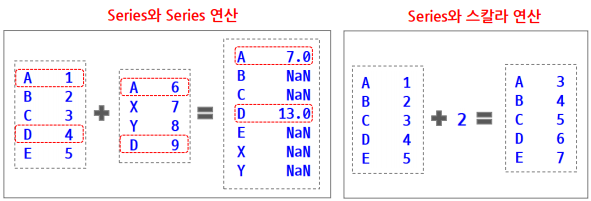

In [ ]:
import numpy as np
import pandas as pd

def printobj(*a):
    for x in a:
        print(x)
        print('-' * 25)

In [ ]:
# 같은 인덱스 구성인 경우
a = np.arange(1, 6)
b = np.arange(6, 11)    
s1 = pd.Series(a)
s2 = pd.Series(b)
printobj(s1, s2, s1 + s2)

In [ ]:
# 서로 다른 index 구성인 경우
a = np.arange(1, 6)
b = np.arange(6, 10)
n1 = ['A', 'B', 'C', 'D', 'E']
n2 = ['A', 'X', 'Y', 'D']     
s1 = pd.Series(a, n1)
s2 = pd.Series(b, n2)
s3 = s1.add(s2, fill_value=0).astype(np.int32)
printobj(s1, s2, s1 + s2, s3)

In [ ]:
# Series 와 스칼라의 연산 => 많이 사용해요!
a = np.arange(1, 6)
n1 = ['A', 'B', 'C', 'D', 'E']
s1 = pd.Series(a, n1)
printobj(s1, s1 + 2)

A    1
B    2
C    3
D    4
E    5
dtype: int64
-------------------------
A    3
B    4
C    5
D    6
E    7
dtype: int64
-------------------------


## 3.DataFrame 생성, 메서드, 연산

### 3-01. DataFrame 생성
- pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
- data : ndarray(structured or homogeneous), Iterable, dict, DataFrame
   - dict 사용시 columns가 지정되지 않으면 dict의 key가 columns로 사용됨
   - DataFrame 사용시 data, index, columns 가 복사 됨
- index, columns : array-like or Index (1D)
   - 생략 시 RangeIndex가 사용됨 (0 부터 1씩 증가하는 숫자 values)
   - index.values 는 hashable 객체이어야 함
   - data로 dict 사용시, dict 의 key 와 columns가 중복될 경우 columns를 따름
   - data로 ndarray 사용시 index.values 개수 == data 행 개수
   - data로 ndarray 사용시 columns.values 개수 == data 열 개수
- dtype : 직접 데이터 타입을 지정하며, 1개의 타입 지정만 가능함
- copy : ndarray(2D), DataFrame을 data로 사용시 copy=False는 연결을 의미함
   - ndarray의 dtype이나, DataFrame의 index, columns 등이 변경이 되면 copy=True로 동작함  


In [36]:
def printobj(*a):
    for x in a:
        print(type(x))
        print(x)
        print("-" * 25)

import pandas as pd
import numpy as np
        
ID = [1900101, 1900102, 1900103, 1900104]
name = ["Kim", "Yoon", "Choi", "Park"]
data = {'name'    : name,
        'english' : [80, 90, 100, 95],
        'chinese' : [100, 80, 70, 85],
        'korean'  : [95, 100, 80, 60]}

In [37]:
# data (dict)를 사용하여 DataFrame을 생성한다, index 는 별도 지정하지 않음    
df = pd.DataFrame(data)
df

,name,english,chinese,korean
0,Kim,80,100,95
1,Yoon,90,80,100
2,Choi,100,70,80
3,Park,95,85,60


In [38]:
# data (dict)를 사용하여 DataFrame을 생성한다, index로 ID를 사용한다
df = pd.DataFrame(data, index=ID)


# df의 index 이름을 'ID'로 지정한다
df.index.name = 'ID'

display(df)

,name,english,chinese,korean
ID,,,,
1900101,Kim,80,100,95
1900102,Yoon,90,80,100
1900103,Choi,100,70,80
1900104,Park,95,85,60


In [42]:
# dict data 
df = pd.DataFrame(data, index = ID,
                  columns = ['name', 'english'])  # columns 선택
df.index.name = 'ID'

# 'korean'이라는 이름의 100, 100, 100, 100을 갖는 Series를 df 에 추가한다
# 추가
df['korean'] = [100] * 4
# 'english'이라는 이름의 90, 80, 100, 100 을 갖는 Series로 df의 'english'를 갱신한다
# 갱신
df['english'] = [90, 80, 100, 100]
display(df)

,name,english,korean
ID,,,
1900101,Kim,90,100
1900102,Yoon,80,100
1900103,Choi,100,100
1900104,Park,100,100


In [ ]:
# ndarray(2D) data 
a = np.random.randint(80, 100, size=(4, 3)).astype(np.float16)
df = pd.DataFrame(a,
                  index=ID,
                  columns = ['english', 'japanese', 'chinese'],
                  copy = True)
df.index.name = 'ID'    
a[0] = [100] * 3
printobj(a, df)

<class 'numpy.ndarray'>
[[100. 100. 100.]
 [ 87.  91.  99.]
 [ 87.  83.  85.]
 [ 83.  94.  80.]]
-------------------------
<class 'pandas.core.frame.DataFrame'>
         english  japanese  chinese
ID                                 
1900101     97.0      99.0     86.0
1900102     87.0      91.0     99.0
1900103     87.0      83.0     85.0
1900104     83.0      94.0     80.0
-------------------------


### 3-02. DataFrame의 연산
- DataFrame 끼리의 연산은 index와 columns를 모두 대상으로 한다
- df + df 의 경우 match 되는 index 나 column 이 없는 경우 NaN 으로 결과가 표시된다

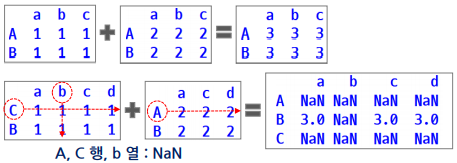

In [ ]:
import pandas as pd
import numpy as np

def printobj(*a):
    for x in a:
        print(type(x))
        print(x)
        print('-'*30)

In [ ]:
#index, columns 모두 동일
df1 = pd.DataFrame( np.full((2,3), 1),
                    index=list("AB"),
                    columns=list("abc") )
df2 = pd.DataFrame( np.full((2,3), 2),
                    index=list("AB"),
                    columns=list("abc") )
printobj(df1, df2, df1 + df2)

<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  1  1  1
B  1  1  1
------------------------------
<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  2  2  2
B  2  2  2
------------------------------
<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  3  3  3
B  3  3  3
------------------------------


In [ ]:
#index, columns 동일하지 않는 경우
df1 = pd.DataFrame( np.full((2,4), 1),
                    index=list("CB"),
                    columns=list("abcd") )
df2 = pd.DataFrame( np.full((2,3), 2),
                    index=list("AB"),
                    columns=list("acd") )    
df3 = df1 + df2
df4 = df1.add(df2, fill_value=0)
printobj(df1, df2, df3, df4)

<class 'pandas.core.frame.DataFrame'>
   a  b  c  d
C  1  1  1  1
B  1  1  1  1
------------------------------
<class 'pandas.core.frame.DataFrame'>
   a  c  d
A  2  2  2
B  2  2  2
------------------------------
<class 'pandas.core.frame.DataFrame'>
     a   b    c    d
A  NaN NaN  NaN  NaN
B  3.0 NaN  3.0  3.0
C  NaN NaN  NaN  NaN
------------------------------
<class 'pandas.core.frame.DataFrame'>
     a    b    c    d
A  2.0  NaN  2.0  2.0
B  3.0  1.0  3.0  3.0
C  1.0  1.0  1.0  1.0
------------------------------


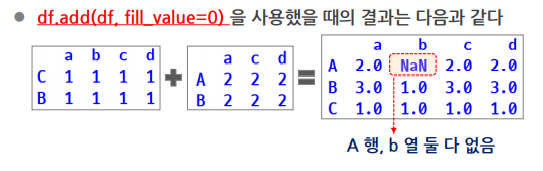

In [ ]:
df = pd.DataFrame( np.full((2,3), 2),
                   index=list("AB"),
                   columns=list("abc") )    
s1 = pd.Series( np.full(3, 1),
                index=list("abc") )
s2 = pd.Series( np.full(3, 3),
                index=list("abx") )

- DataFrame + Series은 DataFrame의 column, Series의 index에 맞춰 연산 된다
- Series가 DataFrame의 row 개수에 맞춰 broadcasting 되어 사용된다
- match 되는 index 가 없는 경우 결과는 NaN 이다


In [ ]:
printobj(df, s1, s2)

<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  2  2  2
B  2  2  2
------------------------------
<class 'pandas.core.series.Series'>
a    1
b    1
c    1
dtype: int64
------------------------------
<class 'pandas.core.series.Series'>
a    3
b    3
x    3
dtype: int64
------------------------------


In [ ]:
df2 = df + s1
printobj(df, s1, df2)

<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  2  2  2
B  2  2  2
------------------------------
<class 'pandas.core.series.Series'>
a    1
b    1
c    1
dtype: int64
------------------------------
<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  3  3  3
B  3  3  3
------------------------------


In [ ]:
df3 = s1 + df
printobj(s1, df, df3)

<class 'pandas.core.series.Series'>
a    1
b    1
c    1
dtype: int64
------------------------------
<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  2  2  2
B  2  2  2
------------------------------
<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  3  3  3
B  3  3  3
------------------------------


In [ ]:
df4 = df + s2
printobj(df, s2, df4)

<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  2  2  2
B  2  2  2
------------------------------
<class 'pandas.core.series.Series'>
a    3
b    3
x    3
dtype: int64
------------------------------
<class 'pandas.core.frame.DataFrame'>
     a    b   c   x
A  5.0  5.0 NaN NaN
B  5.0  5.0 NaN NaN
------------------------------


In [ ]:
df5 = s2 + df
printobj(s2, df, df5)

- DataFrame  + Scalar는 각 원소별로 스칼라와 연산 된다
- 스칼라가 broadcasting 되어 사용된다

In [ ]:
df1 = df + 2
printobj(df, df1)

<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  2  2  2
B  2  2  2
------------------------------
<class 'pandas.core.frame.DataFrame'>
   a  b  c
A  4  4  4
B  4  4  4
------------------------------


### 3-03. DataFrame의 메서드
- df.where(cond, other=nan, inplace=False, ...)
   - cond가 False일 경우 값을 대체함
- df.mask(cond, other=nan, inplace=False, ...)
   - cond가 True일 경우 값을 대체함

- cond : bool Series/DataFrame, array-like, or callable
- other : scalar, Series/DataFrame, or callable   

In [ ]:
import pandas as pd
import numpy as np

In [44]:
df = pd.DataFrame( {'score' : [-1, 10, 70, 101, 99, 82],
                    'name' : ['Tom', 'Jerry', 'Sam', 'Juile', 'Cat', 'Billy']})
df

,score,name
0,-1,Tom
1,10,Jerry
2,70,Sam
3,101,Juile
4,99,Cat
5,82,Billy


In [51]:
# Series.where
# (0<= df['score']) & (df['score'] <=100) 
# np.logical_and(0<= df['score'], df['score'] <=100)
# np.logical_and(, df['score'] )
# df['score']가 0보다 작거나 100보다 큰것에 대해 NaN으로 하는 Series를 생성에 'n_score'로 등록한다
df['n_score'] = df['score'].where( (0<= df['score']) & (df['score'] <=100) )
df

,score,name,n_score
0,-1,Tom,NaN
1,10,Jerry,10.0
2,70,Sam,70.0
3,101,Juile,NaN
4,99,Cat,99.0
5,82,Billy,82.0


In [53]:
df2 = df.dropna()
df2

,score,name,n_score
1,10,Jerry,10.0
2,70,Sam,70.0
4,99,Cat,99.0
5,82,Billy,82.0


In [ ]:
# 0보다 작거나 100보다 큰 것에 대해 Nan으로 하고 NaN으로 하는 Series를 생성에 'm_score'로 등록한다
df['m_score'] = df['score'].mask(   )
df

,score,name,n_score,m_score
0,-1,Tom,NaN,NaN
1,10,Jerry,10.0,10.0
2,70,Sam,70.0,70.0
3,101,Juile,NaN,NaN
4,99,Cat,99.0,99.0
5,82,Billy,82.0,82.0


## 4.DataFrame, Series의 삽입, 삭제, 갱신

### 4-01. Series 추가, 갱신, 삭제


In [ ]:
import pandas as pd

def printobj(*a):
    for x in a:
        print(type(x))
        print(x)
        print("-" * 25)

In [ ]:
ID = [1900101, 1900102, 1900103, 1900104]
name = ["Kim", "Yoon", "Choi", "Park"]
s = pd.Series(ID, index=name)
s

Kim     1900101
Yoon    1900102
Choi    1900103
Park    1900104
dtype: int64

In [ ]:
s['Yoon'] = 1900100   # 갱신
s['Lee']  = 1900200   # 추가 
del s['Kim']          # 삭제
printobj(s, s['Park'], s.Choi)   # 읽기

<class 'pandas.core.series.Series'>
Yoon    1900100
Choi    1900103
Park    1900104
Lee     1900200
dtype: int64
-------------------------
<class 'numpy.int64'>
1900104
-------------------------
<class 'numpy.int64'>
1900103
-------------------------


### 4-02. DataFrame 추가, 갱신, 삭제
- 추가, 갱신 : 항의 개수가 같아야 함
    - column 단위로 추가, 갱신 작업
- df['column_label']=1D array
   - 'column_label'에 해당하는 column 갱신 또는  추가
   - read /write용으로 모두 사용
- df.column_label
   - read 용으로 사용

In [54]:
ID = [1900101, 1900102, 1900103, 1900104]
name = ["Kim", "Yoon", "Choi", "Park"]
data = {'name'    : name,
        'english' : [80, 90, 100, 95],
        'korean'  : [95, 100, 80, 60]}

In [55]:
df = pd.DataFrame(data, index=ID)
df

,name,english,korean
1900101,Kim,80,95
1900102,Yoon,90,100
1900103,Choi,100,80
1900104,Park,95,60


In [57]:
df.english

1900101     80
1900102     90
1900103    100
1900104     95
Name: english, dtype: int64

In [59]:
eng1 = df['english']
eng2 = df.english
df['korean']  = [100] * 4            # 갱신 
#df.python   = [200] * 4            # 추가 - UserWarning
df['chinese'] = [100, 80, 70, 85]    # 추가
printobj(eng1 is eng2, df)

<class 'bool'>
True
-------------------------
<class 'pandas.core.frame.DataFrame'>
         name  english  korean  chinese
1900101   Kim       80     100      100
1900102  Yoon       90     100       80
1900103  Choi      100     100       70
1900104  Park       95     100       85
-------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [ ]:
del df['chinese']
printobj(df)

<class 'pandas.core.frame.DataFrame'>
         name  english  korean
1900101   Kim       80     100
1900102  Yoon       90     100
1900103  Choi      100     100
1900104  Park       95     100
-------------------------


In [ ]:
# 주의사항
s = pd.Series([1, 2, 3],
              index = ['A', 'B', 'sum'])
#s.sum = 10    # 사용하지 말 것
s['sum'] = 10
print(s.sum())
s

13


A       1
B       2
sum    10
dtype: int64

## 5.Index 조작

### 5-01. set_index
- df.set_index(keys, drop=True,  append=False, inplace=False)
- 선택된 columns의 일부로 새로 구성한 index 를 갖는 DataFrame 반환
- keys : 새로운 index 생성에 사용할 column/column 목록(columns labels로 작성)
- drop : keys를 columns 로 부터 제거 여부 (default True => 제거함)
- append : 기존 index를 유지하면서 keys를 추가 여부 (default False => 유지하지 않음)

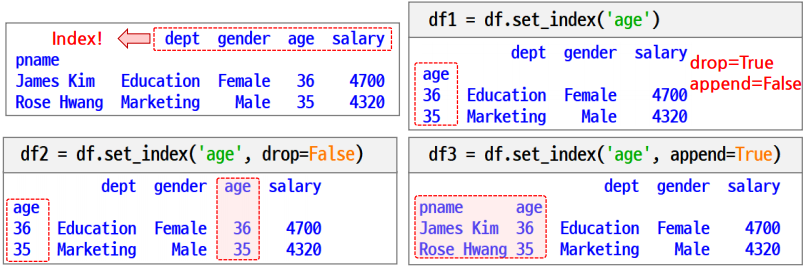

In [ ]:
df = pd.read_csv('easySampleIndex.csv', index_col='pname')
df = df.head(2)
df

,dept,gender,age,salary
pname,,,,
James Kim,Education,Female,36,4700
Rose Hwang,Marketing,Male,35,4320


In [ ]:
# 'age'를 df의 index로 지정하여 반환되는 DataFrame에 df1라는 이름을 지정한다.
df1 = df.set_index('age')
df1

,dept,gender,salary
age,,,
36,Education,Female,4700
35,Marketing,Male,4320


In [ ]:
# 'age'를 df의 index로 지정하되, columns에도 유지되도록 하여 반환되는 DataFrame에 df2라는 이름을 지정한다.
df2 = df.set_index('age', drop=False)
df2

,dept,gender,age,salary
age,,,,
36,Education,Female,36,4700
35,Marketing,Male,35,4320


In [ ]:
# 'age'를 df의 index로 지정하되, 기존에 있는 index가 유지되도록 하여 반환되는 DataFrame에 df3이라는 이름을 붙인다.
df3 = df.set_index('age', append=True)    
df3  # Multilevel Index

,,dept,gender,salary
pname,age,,,
James Kim,36,Education,Female,4700
Rose Hwang,35,Marketing,Male,4320


In [ ]:
# df의 ['dept', 'gender']를 index로 하는 DataFrame에 df4라는 이름을 붙인다
df4 = df.set_index(['dept', 'gender'])
df4

,,age,salary
dept,gender,,
Education,Female,36,4700
Marketing,Male,35,4320


In [ ]:
# df의 ['dept', 'gender']를 index로 하는 DataFrame를 생성할 때, 기존의 index를 유지하면서 생성하고 df5의 이름을 붙인다
df5 = df.set_index(['dept', 'gender'], append=True)
df5

,,,age,salary
pname,dept,gender,,
James Kim,Education,Female,36,4700
Rose Hwang,Marketing,Male,35,4320


### 5-02. reset_index
- df.reset_index( level=None,  drop=False, ...) : 
- 현 index를 columns에 포함하여 새로 구성한 index를 갖는 DataFrame 반환 
- level :int, str, tuple or list 로 작성 (None 이면 모든 index를 대상으로 함)
   - 현 index 중 columns 로 포함 할 대상을 번호 또는 name으로 지정함
   - 모든 index가 columns로 포함되면 RangeIndex가 새로운 Index로 생성됨
- drop : 현 index를 columns 로 포함하지 않을 지의 여부 (drop=True : 포함 안함)

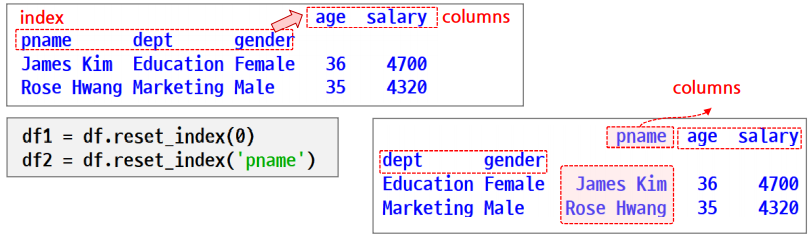

In [ ]:
df = pd.read_csv('easySampleIndex.csv', index_col='pname')
df = df.head(2)
df

,dept,gender,age,salary
pname,,,,
James Kim,Education,Female,36,4700
Rose Hwang,Marketing,Male,35,4320


In [ ]:
# df.reset_index()를 사용하여 df의 index 0번을 columns로 옮긴 뒤, df1 이라는 이름을 붙인다
df1 = df.reset_index(0)
df1

,pname,dept,gender,age,salary
0,James Kim,Education,Female,36,4700
1,Rose Hwang,Marketing,Male,35,4320


In [ ]:
# df1의 index를 출력해 본다
df1.index

RangeIndex(start=0, stop=2, step=1)

In [ ]:
# df.reset_index()를 사용하여 df의 'pname' index를 columns로 옮긴 뒤, df2 이라는 이름을 붙인다
df2 = df.reset_index('pname')
df2

,pname,dept,gender,age,salary
0,James Kim,Education,Female,36,4700
1,Rose Hwang,Marketing,Male,35,4320


In [ ]:
# df의 모든 index를 columns로 옮긴다
df3 = df.reset_index()
df3

,pname,dept,gender,age,salary
0,James Kim,Education,Female,36,4700
1,Rose Hwang,Marketing,Male,35,4320


In [ ]:
# ['dept', 'gender']를 index로 이동한다, 기존 index 'pname'은 유지되도록 한다 
df = df.set_index(['dept', 'gender'], append=True)
df

,,,age,salary
pname,dept,gender,,
James Kim,Education,Female,36,4700
Rose Hwang,Marketing,Male,35,4320


In [ ]:
#df4 = df.reset_index(['pname', 'dept'])
# df의 index에서 ['pname', 'dept']를 columns로 이동한다 (이름이 아닌 순번을 사용한다)
df4 = df.reset_index([0, 1])
df4

,pname,dept,age,salary
gender,,,,
Female,James Kim,Education,36,4700
Male,Rose Hwang,Marketing,35,4320


In [ ]:
# df의 index에서 ['dept', 'gender']를 제거한다 (drop=Trup 옵션을 사용한다)
df5 = df.reset_index([1,2], drop=True)
df5

,age,salary
pname,,
James Kim,36,4700
Rose Hwang,35,4320


### 5-03. sort_index
- df.sort_index(axis=0, level=None, ascending=True, inplace=False,kind='quicksort', na_position=‘last’, ...)
- 축에 따른 index labels를 기준으로 대상을 정렬하는 메서드이다
- axis : 정렬 축 지정, DataFrame은 0, 1 Series은 0을 사용할 수 있음
- level : int, level-name, list of int or level-names
    - MultiIndex 에서 정렬 기준으로 사용할 level을 지정 함
- ascending : True: 오름차순 정렬, False: 내림차순 정렬, list of boolean
- inplace : True인 경우 객체를 직접 수정하고 None 반환
- kind : 정렬 알고리즘 지정 {'quicksort', 'mergesort', 'heapsort'}
- na_position : NA value의 위치, {'first', 'last'}

In [ ]:
import pandas as pd
import shelve

df = shelve.open("easySample")['sample3']
df.head(3)

,pname,birth,dept,english,japanese,chinese,salary,overtime
ID,,,,,,,,
18030201,James Kim,1990-01-23,Education,1,1,0,3456,23:10:10
18030202,Rose Hwang,1992-10-11,Marketing,0,2,0,4320,10:15:17
19030401,Sam Park,1995-07-02,Education,1,0,0,5600,16:21:10


In [ ]:
df.index

Int64Index([18030201, 18030202, 19030401, 19070101, 19070102, 19070103,
            19080101, 19080102, 19090201, 19090202],
           dtype='int64', name='ID')

In [ ]:
df.columns

Index(['pname', 'birth', 'dept', 'english', 'japanese', 'chinese', 'salary',
       'overtime'],
      dtype='object')

In [ ]:
# df의 index를 내림차순으로 정렬하여 df1으로 이름 붙인다
df1 = df.sort_index(ascending=False)
df1

In [ ]:
# df의 columns를 오름차순으로 정렬하여 df2로 이름 붙인다
df2 = df.sort_index(axis=1)
df2.head(3)

In [ ]:
# df의 columns에서 'dept', 'pname'를 index로 추가 사용(기존 index 유지)하도록 하여  df3으로 이름 붙인다
df3 = df.set_index(['dept', 'pname'], append=True)
df3

In [ ]:
# df3의 index를 정렬하여 df4로 이름 붙인다
df4 = df3.sort_index()
df4

In [ ]:
# df3의 1, 2 번 위치의 index를 기준으로 2차 정렬하되, 
# 1번 index 오름차순, 2번 index 내림차순으로 정렬하여 df5로 이름 붙인다
df5 = df3.sort_index(level=[1, 2],ascending=[True, False])
df5

### 5-04. sort_values
- df.sort_values(by, axis=0, ascending=True, inplace=False,kind='quicksort’, na_position='last')
- 축에 따른 by 목록의 values를 기준으로 대상을 정렬하여 반환한다
- by : str 또는 list of str을 사용하여 정렬 기준이 되는 이름 또는 이름 목록 지정
- axis=0 : column labels, axis=1 : index labels를 사용하여 이름 목록 작성
- axis=1 사용을 위해서는 모든 columns의 dtype이 동일해야 함(거의 사용 안함)

In [ ]:
dfna = pd.read_csv("easySample2.csv", index_col="ID")
dfna = dfna[['pname', 'english', 'chinese']].head()
dfna

,pname,english,chinese
ID,,,
18030201,James Kim,1,
18030202,Rose Hwang,,NaN
19030401,Sam Park,1,NaN
19070101,Chris Jang,NaN,3
19070102,Grace Lee,NaN,NaN


In [ ]:
# dfna의 'pname'을 기준으로 정렬한 결과에 df1이라는 이름을 붙인다
df1 = dfna.sort_values('pname')  
df1

,pname,english,chinese
ID,,,
19070101,Chris Jang,NaN,3
19070102,Grace Lee,NaN,NaN
18030201,James Kim,1,
18030202,Rose Hwang,,NaN
19030401,Sam Park,1,NaN


In [ ]:
# dfna의 'english', 'pname'으로 2차 정렬한 결과에 df2라는 이름을 붙인다.
# 'english'는 오름차순, 'pname'은 내림차순 정렬한다
df2 = dfna.sort_values(['english', 'pname'],
                       ascending=[True, False])
df2

,pname,english,chinese
ID,,,
18030202,Rose Hwang,,NaN
19030401,Sam Park,1,NaN
18030201,James Kim,1,
19070102,Grace Lee,NaN,NaN
19070101,Chris Jang,NaN,3


In [ ]:
df = pd.DataFrame( {'A' : [ 60, 50, 40, 30],
                    'C' : [ np.nan, 30, 10, 20],
                    'B' : [ 'Kim', 'Park', 'Choi', 'Lee'],
                    'D' : [ 10, 20, 10, 20]})
df

,A,C,B,D
0,60,NaN,Kim,10
1,50,30.0,Park,20
2,40,10.0,Choi,10
3,30,20.0,Lee,20


In [ ]:
# df의 'D', 'A'를 기준으로 2차 정렬하여 결과를 df1으로 이름 붙인다.
df1 = df.sort_values(by=['D', 'A'])
df1

,A,C,B,D
2,40,10.0,Choi,10
0,60,NaN,Kim,10
3,30,20.0,Lee,20
1,50,30.0,Park,20


In [ ]:
# dft의 axis=1의 1번 index 행을 기준으로 정렬하여 결과를 df2로 이름 붙인다.
dft = df[['A', 'C', 'D']]
df2 = dft.sort_values(1, axis=1, ascending=True)
df2

,D,C,A
0,10,NaN,60
1,20,30.0,50
2,10,10.0,40
3,20,20.0,30


In [ ]:
# df의 'C' 열을 기준으로 정렬하되, NA를 앞에 위치하도록 한다
df3 = df.sort_values(by='C', na_position='first')
df3

,A,C,B,D
0,60,NaN,Kim,10
2,40,10.0,Choi,10
3,30,20.0,Lee,20
1,50,30.0,Park,20


## 6.Indexing
- index를 사용하여 원하는 내용(values)에 접근하는 방법
- 접근하여 읽기, 쓰기 등의 작업을 함
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html  
- indexing의 종류
  - Basic Indexing : 1개 indexer 사용
  - Multi-axis Indexing : axis 별 indexer 사용
      - Selection by Label : label을 사용함
      - Selection by Position : integer를 사용함
- indexer의 종류
  - a single label/integer : 1개의 label 또는 integer
  - a list or array of labels/integers : label 또는 integer의 리스트 또는 배열
  - a slice object with labels/integers : label 또는 integer의 slice (start:stop:step)
  - a boolean array : True/False로 이루어진 boolean type의 배열 (배열의 요소수는 index의 요소수와 동일해야 함)
  - a collable function with one argument (다루지 않음)

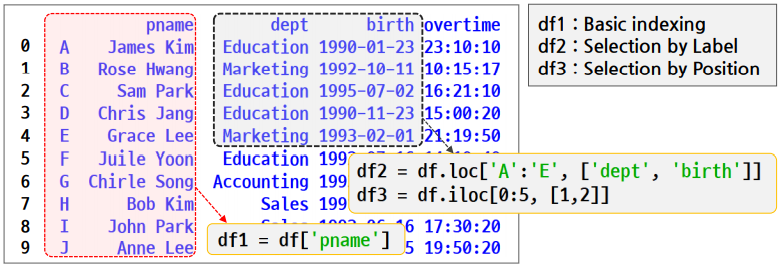

### 6-01. Basic Indexing
- indexer를 1개만 사용하는 indexing
- Series의 경우 labels/integers를 모두 사용할 수 있음
- DataFrame의 경우 종류에 따라 기준이 되는 axis와 labels/integers 의 사용이 다름
  


In [61]:
import pandas as pd
import numpy as np
import shelve  # 바이너리 파일 저장, 읽기, dict

df = shelve.open("easySample")['sample3']
df = df[['pname', 'dept', 'birth', 'overtime']]
df.index = pd.Index(list("ABCDEFGHIJ"))
df

,pname,dept,birth,overtime
A,James Kim,Education,1990-01-23,0 days 23:10:10
B,Rose Hwang,Marketing,1992-10-11,0 days 10:15:17
C,Sam Park,Education,1995-07-02,0 days 16:21:10
D,Chris Jang,Education,1990-11-23,0 days 15:00:20
E,Grace Lee,Marketing,1993-02-01,0 days 21:19:50
F,Juile Yoon,Education,1992-07-16,0 days 14:10:40
G,Chirle Song,Accounting,1993-04-11,0 days 09:50:30
H,Bob Kim,Sales,1991-12-07,0 days 08:40:40
I,John Park,Sales,1992-06-16,0 days 17:30:20
J,Anne Lee,Education,1993-05-05,0 days 19:50:20


In [81]:
df.iloc[ :, :-1]

,pname,dept,birth
A,James Kim,Education,1990-01-23
B,Rose Hwang,Marketing,1992-10-11
C,Sam Park,Education,1995-07-02
D,Chris Jang,Education,1990-11-23
E,Grace Lee,Marketing,1993-02-01
F,Juile Yoon,Education,1992-07-16
G,Chirle Song,Accounting,1993-04-11
H,Bob Kim,Sales,1991-12-07
I,John Park,Sales,1992-06-16
J,Anne Lee,Education,1993-05-05


In [87]:
df.iloc[:, -1]    # Series

A   0 days 23:10:10
B   0 days 10:15:17
C   0 days 16:21:10
D   0 days 15:00:20
E   0 days 21:19:50
F   0 days 14:10:40
G   0 days 09:50:30
H   0 days 08:40:40
I   0 days 17:30:20
J   0 days 19:50:20
Name: overtime, dtype: timedelta64[ns]

#### 6-01-1. Basic Indexing of Series


In [62]:
# Series 구하기
s = df['pname']
s.head(7)

A      James Kim
B     Rose Hwang
C       Sam Park
D     Chris Jang
E      Grace Lee
F     Juile Yoon
G    Chirle Song
Name: pname, dtype: object

In [63]:
# a single label/integer
# 첫 번째 element인 'James Kim' 을 Scalar로 가져오기 합니다.
print(s[0], s['A'])

James Kim James Kim


In [64]:
# a list or array of labels/integers
# James Kim, Sam Park, Julie Yoon을 Series로 가져오기 합니다.
print(s[[0,2,5]],s[['A','C','F']], sep='\n\n')

A     James Kim
C      Sam Park
F    Juile Yoon
Name: pname, dtype: object

A     James Kim
C      Sam Park
F    Juile Yoon
Name: pname, dtype: object


In [65]:
# a slice object with labels/integers
# 처음 3개의 element를 Series로 가져오기 합니다
print(s[:3],s[:'C'], sep='\n\n')

A     James Kim
B    Rose Hwang
C      Sam Park
Name: pname, dtype: object

A     James Kim
B    Rose Hwang
C      Sam Park
Name: pname, dtype: object


In [66]:
s.str.startswith('J') 

A     True
B    False
C    False
D    False
E    False
F     True
G    False
H    False
I     True
J    False
Name: pname, dtype: bool

In [67]:
# a boolean array => list, Series
# s에서 'J'로 시작하는 것을 Series로 가져오기 합니다.
# 'J'로 시작하는 것에 대한 조건 :  s.str.startswith('J')
print(s[  s.str.startswith('J')  ])

A     James Kim
F    Juile Yoon
I     John Park
Name: pname, dtype: object


#### 6-01-2. Basic Indexing of DataFrame


In [74]:
# a single label     # axis = 1
# 'pname' column을 Series로 가져오기 합니다.
#s1 = df['pname'] 
s1 = df.loc[:, 'pname']                       
s1  

A      James Kim
B     Rose Hwang
C       Sam Park
D     Chris Jang
E      Grace Lee
F     Juile Yoon
G    Chirle Song
H        Bob Kim
I      John Park
J       Anne Lee
Name: pname, dtype: object

In [75]:
# a list or array of labels    # axis = 1
# 'pname', 'dept', 'birth' column에 대해 DataFrame으로 가져오기 합니다.
df2 = df[['pname', 'dept', 'birth']]  
df2 = df.loc[:, ['pname', 'dept', 'birth']]
df2

,pname,dept,birth
A,James Kim,Education,1990-01-23
B,Rose Hwang,Marketing,1992-10-11
C,Sam Park,Education,1995-07-02
D,Chris Jang,Education,1990-11-23
E,Grace Lee,Marketing,1993-02-01
F,Juile Yoon,Education,1992-07-16
G,Chirle Song,Accounting,1993-04-11
H,Bob Kim,Sales,1991-12-07
I,John Park,Sales,1992-06-16
J,Anne Lee,Education,1993-05-05


In [76]:
# a slice object with integers 
# 3~5번 index 번호에 해당하는 rows에 대해 DataFrame으로 가져오기 합니다.
#df3 = df[3:6]   
df3 = df.iloc[3:6, :]                      
display(df3)
# a slice object with labels   
#df3 = df['D':'F']
df3 =df.loc['D':'F', :]
display(df3)   

,pname,dept,birth,overtime
D,Chris Jang,Education,1990-11-23,0 days 15:00:20
E,Grace Lee,Marketing,1993-02-01,0 days 21:19:50
F,Juile Yoon,Education,1992-07-16,0 days 14:10:40


,pname,dept,birth,overtime
D,Chris Jang,Education,1990-11-23,0 days 15:00:20
E,Grace Lee,Marketing,1993-02-01,0 days 21:19:50
F,Juile Yoon,Education,1992-07-16,0 days 14:10:40


In [71]:
df['dept'] == 'Marketing'

A    False
B     True
C    False
D    False
E     True
F    False
G    False
H    False
I    False
J    False
Name: dept, dtype: bool

In [79]:
# a boolean array     # axis = 0 
# 부서('dept')가 'Marketing'인 것에 대해서 DataFrame으로 가져오기 합니다.
#df4 = df[ df['dept'] == 'Marketing' ]   
#display(df['dept'] == 'Marketing')   
df4 = df.iloc[ (df['dept'] == 'Marketing').to_list() ]   
df4

,pname,dept,birth,overtime
B,Rose Hwang,Marketing,1992-10-11,0 days 10:15:17
E,Grace Lee,Marketing,1993-02-01,0 days 21:19:50


#### 6-01-3. Basic Indexing - Boolean Indexer 연습

In [ ]:
import shelve
myShelf = shelve.open('easySample')
df = myShelf['sample3'][['pname','dept', 'english', 'salary']]
df.index = pd.RangeIndex(0, len(df))
df

,pname,dept,english,salary
0,James Kim,Education,1,3456
1,Rose Hwang,Marketing,0,4320
2,Sam Park,Education,1,5600
3,Chris Jang,Education,0,4500
4,Grace Lee,Marketing,0,3150
5,Juile Yoon,Education,0,4200
6,Chirle Song,Accounting,2,4800
7,Bob Kim,Sales,1,10100
8,John Park,Sales,3,6840
9,Anne Lee,Education,0,4750


In [ ]:
# 'english', 'salary', 'dept' column에 대해 
# single label indexer를 사용하여 indexing하여 각각 se, ss, sd 라는 이름을 부여한다


In [ ]:
print(se.head(3), ss.head(3), sd.head(3), sep='\n\n')

0    1
1    0
2    1
Name: english, dtype: int32

0    3456
1    4320
2    5600
Name: salary, dtype: int32

0    Education
1    Marketing
2    Education
Name: dept, dtype: category
Categories (4, object): [Accounting, Education, Marketing, Sales]


In [ ]:
# se가 0보다 큰 것에 대해 boolean indexer를 사용하여 indexing 한다

x

,pname,dept,english,salary
0,James Kim,Education,1,3456
2,Sam Park,Education,1,5600
6,Chirle Song,Accounting,2,4800
7,Bob Kim,Sales,1,10100
8,John Park,Sales,3,6840


In [ ]:
# se가 se의 평균값*2 보다 큰 것에 대해 boolean indexer를 사용하여 indexing 한다
x = 
x

,pname,dept,english,salary
6,Chirle Song,Accounting,2,4800
8,John Park,Sales,3,6840


In [ ]:
se.mean() * 2

1.6

In [ ]:
# df에서 ss(salay)가 4500 초과이면서 5000 미만인 것에 대해 boolean indexer를 사용하여 indexing 한다
# () & () 사용
x = 
x

,pname,dept,english,salary
6,Chirle Song,Accounting,2,4800
9,Anne Lee,Education,0,4750


In [ ]:
# df에서 ss(salay)가 4500 초과이면서 5000 미만인 것에 대해 boolean indexer를 사용하여 indexing 한다
# np.logical_and() 사용
x = 
x

,pname,dept,english,salary
6,Chirle Song,Accounting,2,4800
9,Anne Lee,Education,0,4750


In [ ]:
# df에서 sd(dept)가 'Marketing'이거나 'Accounting' 인 것을 boolean indexer를 사용하여 indexing 한다
# () | () 사용
x = 
x

,pname,dept,english,salary
1,Rose Hwang,Marketing,0,4320
4,Grace Lee,Marketing,0,3150
6,Chirle Song,Accounting,2,4800


In [ ]:
# df에서 sd(dept)가 'Marketing'이거나 'Accounting' 인 것을 boolean indexer를 사용하여 indexing 한다 
# np.logical_or() 사용
x = 
x

,pname,dept,english,salary
1,Rose Hwang,Marketing,0,4320
4,Grace Lee,Marketing,0,3150
6,Chirle Song,Accounting,2,4800


In [ ]:
# df에서 sd(dept)가 'Education'이 아닌 것을 boolean indexer를 사용하여 indexing한다
# ~ ( ) 사용
x =
x

,pname,dept,english,salary
1,Rose Hwang,Marketing,0,4320
4,Grace Lee,Marketing,0,3150
6,Chirle Song,Accounting,2,4800
7,Bob Kim,Sales,1,10100
8,John Park,Sales,3,6840


In [ ]:
# df에서 sd(dept)가 'Education'이 아닌 것을 boolean indexer를 사용하여 indexing한다
# np.logical_not() 사용

x

,pname,dept,english,salary
1,Rose Hwang,Marketing,0,4320
4,Grace Lee,Marketing,0,3150
6,Chirle Song,Accounting,2,4800
7,Bob Kim,Sales,1,10100
8,John Park,Sales,3,6840


#### 6-01-4. isin() 을 사용한 Boolean Indexing
- 목록에 포함된 내용이 있을 때 True 아니면 False
   - df.isin(list/dict) 
   - s.isin(list)



In [ ]:
import pandas as pd
import numpy as np

name = ["Kim","Yoon", "Choi", "Park"]
data = {'korean'  : ['A', 'A', 'A', 'B'],
        'english' : ['B', 'A', 'C', 'B']}        
df = pd.DataFrame(data, index = name)
df

,korean,english
Kim,A,B
Yoon,A,A
Choi,A,C
Park,B,B


In [ ]:
# df에서 'B' 또는 'C'인 것을 True 아니면 False하는 DataFrame을 만들어 df1으로 이름 붙인다

df1

,korean,english
Kim,False,True
Yoon,False,False
Choi,False,True
Park,True,True


In [ ]:
w = {'korean'  : ['A'],
     'english' : ['A', 'B']}
# dict 객체 w를 사용하여
# 'korean'에서는 'A', 'english'에서는 'A', 'B' 인 것에 대해 True 아니면 False로 하는  DataFrame을 만들어 df2로 이름 붙인다     


df3 = df[df2]   # boolean indexing - False에 해당하는 것을 NaN으로 처리함

In [ ]:
display(df2, df3)

,korean,english
Kim,True,True
Yoon,True,True
Choi,True,False
Park,False,True


,korean,english
Kim,A,B
Yoon,A,A
Choi,A,NaN
Park,NaN,B


In [ ]:
# 'english' column을 s라는 이름으로 저장한다

# s에대해 'A'에 해당하면 True, 아니면 False로 하는 Series를 생성한다 (isin() 사용)

# s에대해 'B' 또는 'C'에 해당하면 True, 아니면 False로 하는 Series를 생성한다 (isin() 사용)

display(s1, s2)

In [ ]:
# s1, s2를 사용하여 df를 indexing 한다
df1 = df[s1]   # boolean index
df2 = df[s2]

In [ ]:
display(df, df1, df2)

In [ ]:
# isin() 과 동일한 결과를 갖도록 ==, | 등의 연산자를 사용하여 조건을 작성한다
df1 = 
df2 =
display(df, df1, df2)

,korean,english
Kim,A,B
Yoon,A,A
Choi,A,C
Park,B,B


,korean,english
Yoon,A,A


,korean,english
Kim,A,B
Choi,A,C
Park,B,B


#### 6-01-5. Accessor를 사용
- [Accessor](https://pandas.pydata.org/docs/reference/series.html?highlight=accessor#accessors)
- datetime, object(str) dtype의 Series에 있는 Accessor
   - datetime, timedelta : dt  ([dt detail](https://pandas.pydata.org/docs/reference/series.html?highlight=accessor#api-series-dt))
   - object(str) : str ([str detail](https://pandas.pydata.org/docs/reference/series.html?highlight=accessor#api-series-str))

In [ ]:
import pandas as pd
import numpy as np
import shelve

with shelve.open('easySample') as myShelf:
  df = myShelf['sample3']

df.index = pd.RangeIndex(len(df))
df.head()

In [ ]:
df = df[['pname', 'birth']]
df.info()

In [ ]:
sb = df['birth']  # Series
# df에 'birth'에서 year에 대한 것을 'year' column으로 추가한다
df['year'] = sb.dt.year
# 'year'가 1992인 것만 indexing 하여 df2로 저장한다
df2 = df[df['year'] == 1992]
display(df, df2)

In [ ]:
df.birth.dt.year

0    1990
1    1992
2    1995
3    1990
4    1993
5    1992
6    1993
7    1991
8    1992
9    1993
Name: birth, dtype: int64

In [ ]:
# birth(datetime64, dt)에 대해서 year, month, day, weekday, dayofyear를 column으로 하는 새로운 DataFrame 생성 (df2)
# df2의 index는 df의 'pname'으로 한다 (df2 생성 후 index 교체)
a = df.birth.dt
mydata = {'year' : a.year, 'month': a.month, 'day' : a.day,
          'weekday' : a.weekday, 'dayofyear' : a.dayofyear}
df2 = pd.DataFrame(mydata) # index = df['pname'] - 주의사항        
df2.index = df['pname']

display(df2)

In [ ]:
# 0 월  1 화 ...... 6 일
#wday = dict(zip(range(7), '월 화 수 목 금 토 일'.split()))
wday = { 0: '월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

df2['weekday'] = df2['weekday'].replace(wday)
df2

,year,month,day,weekday,dayofyear
pname,,,,,
James Kim,1990,1,23,화,23
Rose Hwang,1992,10,11,일,285
Sam Park,1995,7,2,일,183
Chris Jang,1990,11,23,금,327
Grace Lee,1993,2,1,월,32
Juile Yoon,1992,7,16,목,198
Chirle Song,1993,4,11,일,101
Bob Kim,1991,12,7,토,341
John Park,1992,6,16,화,168


In [ ]:
# timedelta의 경우 
with shelve.open('easySample') as myShelf:
  df = myShelf['sample3']

df.index = pd.RangeIndex(len(df))
df = df[['pname', 'overtime']]
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   pname     10 non-null     object         
 1   overtime  10 non-null     timedelta64[ns]
dtypes: object(1), timedelta64[ns](1)
memory usage: 288.0+ bytes


In [ ]:
# 3970초는 몇 시간, 몇 분, 몇 초 일까?
min, sec = divmod(3750, 60)
hour, min = divmod(min, 60)
print(hour, min, sec)


In [ ]:
seconds = df.overtime.dt.seconds
# 시간, 분, 초로 나누어 저장한다
df['minute'], df['second'] = divmod(seconds, 60)
df['hour'], df['minute'] = divmod(df['minute'], 60)

# 18시간 이상인 것에 대해 boolean indexing

df[df['hour'] >= 18]

### 6-02. Multi-axis Indexing
- 축(axis) 별로 indexer를 사용하는 indexing 방법
- Multi-axis indexing의 종류
   - Selection by Label : ```df.loc[label_indexer, label_indexer]```
   - Selection by Position : ```df.iloc[integer_indexer, integer_indexer]```

- indexer
   - single label/integer
   - list/array of label/integer
   - slice object of label/integer
   - boolean array : 원본과 shape이 같은 bool 타입의 배열
     - Selection by Label 은  list, ndarray, Series를 모두 사용할 수 있음
     - Selection by Position에서는 Series 사용을 할 수 없음
     - Series.to_list(), Series.to_numpy() 를 사용하여 list, ndarray로 변환하여 사용함

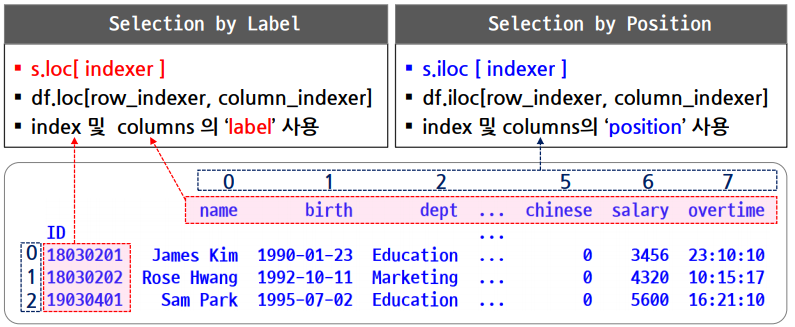

#### 6-02-1. Selection by Label 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
## single label indexer - unique 
df = pd.DataFrame( np.arange(12).reshape(3,4),
                    index=list('abc'),
                    columns=list('ABCD'))

df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [ ]:
# 'a' 행으로 Series를 만들어 df1으로 이름 붙인다.
df1 = 

# 'A' 열로 Series를 만들어 df1로 이름 붙인다
df2 = 

# 'a'행, 'C'열의 값을 가져와 df3으로 이름 붙인다
df3 = 
display(df1, df2, df3)

A    0
B    1
C    2
D    3
Name: a, dtype: int64

a    0
b    4
c    8
Name: A, dtype: int64

2

In [ ]:
### single label indexer - not unique : 해당하는 모든 것이 selection 됨
df = pd.DataFrame( np.arange(12).reshape(3,4),
                    index=list('aba'),
                    columns=list('CBCD'))
# 'a'행을 가져와 df1으로 이름 붙인다, 여러 개의 'a'가 있을 경우 모두 가져옴
df1 = 
# 'a'행의 'C'열을 가져와 df2로 이름 붙인다. 여러 개의 'a', 'A'가 있을 경우 모두 가져옴
df2 =  
display(df, df1, df2)

,C,B,C,D
a,0,1,2,3
b,4,5,6,7
a,8,9,10,11


,C,B,C,D
a,0,1,2,3
a,8,9,10,11


,C,C
a,0,2
a,8,10


In [ ]:
## a list of array of labels     

df = pd.DataFrame( np.arange(12).reshape(3,4),
                    index=list('abc'),
                    columns=list('ABCD'))

df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [ ]:
# df에서 'a', 'b' 행을 사용하여 DataFrame으로 생성해 df1으로 이름 붙인다
df1 = 

# df에서 'A', 'D' 열 사용하여 DataFrame으로 생성해 df2로 이름 붙인다
df2 = 

# df에서 'a', 'b' 행, 'A', 'B', 'D' 열을 사용하여 DataFrame으로 생성해 df3으로 이름 붙인다
df3 = 
display(df1, df2, df3)

In [ ]:
## a slice object with labels
### sorted by index    

df = pd.DataFrame( np.arange(12).reshape(3,4),
                    index=list('bab'),
                    columns=list('ABCD'))
df.sort_index(axis='index', inplace=True)
df

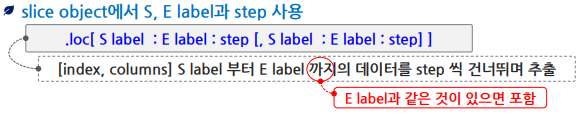

In [ ]:
# slice object 사용하기
# df의 index에서 처음부터 'a'까지 가져와 df1로 이름 붙인다
df1 = 

# df의 index에서 처음부터 'b'까지, columns에서 'A' ~ 'C' 까지 가져와 df2로 이름 붙인다.
df2 =

# df의 columns에서 'B'부터 'D'까지 가져와 df3으로 이름 붙인다.
df3 = 
display(df1, df2, df3)

#### 6-02-2. category, datetime, timedelta 데이터타입에 대한 indexing


In [ ]:
##category - 존재하는 것만 사용해야 함 아니면 KeyError
 
df = pd.DataFrame( np.arange(12).reshape(3,4),
                    index = pd.Categorical(list('abc')),
                    columns= list('BCCD') )
df

In [ ]:
# df에서 'b'행, 'C', 'D' 열을 DataFrame type으로 가져와 df1으로 이름 붙인다  
df1 = 
df1

In [ ]:
# df에서 'b':'d' 행을 가져와 df2로 이름 붙인다
df2 =

In [ ]:
# df에서 'C':'E'열을 가져와 df3으로 이름 붙인다
df3 = 

In [ ]:
##datetime - 구분기호 없이 문자열로 취급

df = pd.DataFrame(np.arange(15).reshape(5,3),
                  index = pd.to_datetime([4,3,1,2,5], unit='D',
                                          origin=pd.Timestamp('2020-01-03')),
                  columns = list('ABC'))
df = df.sort_index(axis=0)
df

In [ ]:
# datatime은 문자열로 취급할 수 있다.
df1 = df.loc['20200104':'20200106', ['B', 'C']]
df2 = df.loc['20200105':'20200110']
display(df1, df2)


In [ ]:
##timedelta - ':'로 구분하여 문자열로 표기
np.random.seed(100) 
time = np.arange(1,7)*1000
df = pd.DataFrame(np.arange(18).reshape(6, 3),
                  index = pd.to_timedelta(time, unit='s'),
                  columns = list('ABC'))
# timedelta를 '시간:분:초' 로 표시되는 문자열로 취급하여 indexer로 사용할 수 있다. 
df1 = df.loc['01:00:00':'02:00:00']
df2 = df.loc['00:30:00':'01:23:20']
display(df, df1, df2)

#### 6-02-3. Selection by Position

In [ ]:
## single integer
 
df = pd.DataFrame( np.arange(12).reshape(3,4),
                    index=list('abc'),
                    columns=list('ABCD'))
df

In [ ]:
# 각 indexing을 해석해 보세요

In [ ]:
s1 = df.iloc[2]
s1

In [ ]:
s2 = df.iloc[:, 1]
s2

In [ ]:
v = df.iloc[1, 2]
v

In [ ]:
## a list/array of integer
   
df = pd.DataFrame( np.arange(12).reshape(3,4),
                    index=list('abc'),
                    columns=list('ABCD'))

df

In [ ]:
df1 = df.iloc[[1, 2, 2], :]
df1

In [ ]:
df2 = df.iloc[[1, 2], [0, 2, 3]]
df2

In [ ]:
## a slice object with integer  (start:stop:step)  stop은 포함하지 않음

df = pd.DataFrame( np.arange(12).reshape(3,4),
                    index=list('abc'),
                    columns=list('ABCD'))
df

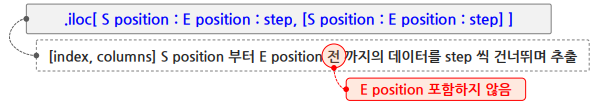

In [ ]:
df1 = df.iloc[:2]  
df2 = df.iloc[::-1]    # reverse
display(df1, df2)

In [ ]:
df3 = df.iloc[:, 1:3]
df4 = df.iloc[2:7]     # can use
display(df3, df4)

In [ ]:
df5 = df.iloc[:5, 2:]
df6 = df.iloc[:, :-1]  # except last column
display(df5, df6)

#### 6-02-4. Boolean indexing

In [ ]:
매/ 우 / 중 /요

In [ ]:
mydata = {'A' : list("abcde"),
          'B' : list("cbdfd"),
          'C' : list("zsyjc")}

df = pd.DataFrame(mydata, index=['one', 'two', 'three', 'four', 'five'])
df

In [ ]:
# .iloc[]은 Series 객체를 사용할 수 없음
#df[ (df.A == 'a') | (df.A == 'b')]
#df.loc[(df.A == 'a') | (df.A == 'b'), :]
df.iloc[((df.A == 'a') | (df.A == 'b')).to_list()]

In [ ]:
df = pd.DataFrame(np.random.randint(1, 100, (5, 3)),
                  index = list('ABCDE'), columns = list('abc'))

df

,a,b,c
A,36,48,48
B,80,70,49
C,18,12,54
D,87,3,65
E,45,40,14


In [ ]:
# a의 값이 50보다 큰것에 대해 DataFrame으로 반환 받아 df1 이름을 붙인다 
df1 = df[df.a > 50]
df2 = df.iloc[(df.a>50).to_list(),:]
display(df1, df2)

,a,b,c
B,80,70,49
D,87,3,65


,a,b,c
B,80,70,49
D,87,3,65


In [ ]:
# ridx 는 df.a의 값이 50보다 크고, df.b의 값이 50보다 큰 것
ridx = 

# cidx 는 df의 'A'행의 값이 'C' 행의 값보다 큰 것
cidx = 

# ridx, cidx를 사용한 df를 사용하여 df3 생성
df3 =

# ridx, cidx, iloc을 사용하여 df4를 생성
df4 =  
display(df3, df4)

### 6-03. Indexing for Multilevel index
- 여러 개의 column 또는 row로 이루어진 index
- 여러 개의 column/row를 level로 취급함

- pd.MultiIndex.from_product( iterables, names )
    - iterables : MultiIndex 각 column을 항으로 하는 1D array
    - 각 항의 개수를 곱한 것 만큼의 항이 생성됨
- pd.MultiIndex.from_tuples(tuples, names)
    - tuples : MultiIndex 각 row를 항으로 하는 1D array
    - names : index의 각 column 이름, 1D array


In [ ]:
import pandas as pd
import numpy as np
import shelve

np.random.seed(100)

In [ ]:
midx_c = pd.MultiIndex.from_product([['A','B'], ['a', 'b']])
midx_r = pd.MultiIndex.from_tuples([['a','x'],['a','y'], ['b','x'], ['b','y']])
df = pd.DataFrame( np.random.randint(50,90, (4, 4)),
                   index = midx_r,
                   columns = midx_c )

In [ ]:
df

In [ ]:
df1 = df['A']['a']   # basic indexing - columns 기준
df2 = df.loc[:,('A','a')]
display(df1, df2)

In [ ]:
df3 = df.copy()
df3[('A','a')] = [100]*4  # OKay
df3

In [ ]:
df3 = df.copy()
df3['A']['a'] = [100]*4  # Error     
df3

In [ ]:
# MultiIndex를 지정할 땐 튜플을 사용한다
df3.loc[('a','y'),('B','b')] = 1234
df3

In [ ]:
# df.droplevel(level, axis=0) : level이 제거된 df반환
df4 = df.droplevel(1, axis=1)
df4

### 6-04. Indexing - exercise

In [2]:
import shelve
import pandas as pd


In [5]:
df = shelve.open('easySample0')['sample3']
df

,pname,birth,dept,english,japanese,chinese,salary,overtime
ID,,,,,,,,
18030201,James Kim,1990-01-23,Education,1,1,0,3456,0 days 23:10:10
18030202,Rose Hwang,1992-10-11,Marketing,0,2,0,4320,0 days 10:15:17
19030401,Sam Park,1995-07-02,Education,1,0,0,5600,0 days 16:21:10
19070101,Chris Jang,1990-11-23,Education,0,0,3,4500,0 days 15:00:20
19070102,Grace Lee,1993-02-01,Marketing,0,0,0,3150,0 days 21:19:50
19070103,Juile Yoon,1992-07-16,Education,0,0,1,4200,0 days 14:10:40
19080101,Chirle Song,1993-04-11,Accounting,2,0,0,4800,0 days 09:50:30
19080102,Bob Kim,1991-12-07,Sales,1,1,1,10100,0 days 08:40:40
19090201,John Park,1992-06-16,Sales,3,1,2,6840,0 days 17:30:20


In [ ]:
df.info()

In [ ]:
# df에서 'pname', 'birth', 'dept', 'salary' 열 가져오기
#df1 = df[['pname', 'birth', 'dept', 'salary']]
df1 = df.loc[:, ['pname', 'birth', 'dept', 'salary']]
df1

,pname,birth,dept,salary
ID,,,,
18030201,James Kim,1990-01-23,Education,3456
18030202,Rose Hwang,1992-10-11,Marketing,4320
19030401,Sam Park,1995-07-02,Education,5600
19070101,Chris Jang,1990-11-23,Education,4500
19070102,Grace Lee,1993-02-01,Marketing,3150
19070103,Juile Yoon,1992-07-16,Education,4200
19080101,Chirle Song,1993-04-11,Accounting,4800
19080102,Bob Kim,1991-12-07,Sales,10100
19090201,John Park,1992-06-16,Sales,6840


In [ ]:
# df에서 dept가 'Education'이고 chinese가 1인 행에 대해  'pname', 'dept', 'chinese' 열 가져오기


df2

,dept,chinese,pname
ID,,,
19070103,Education,1,Juile Yoon
19090202,Education,1,Anne Lee


In [ ]:
# df에서 birth의 year가 1992인 행에 대해 'birth', 'salary', 'overtime' 열 가져오기
df3 = 
df3

<class 'pandas.core.frame.DataFrame'>
              birth  salary overtime
ID                                  
18030202 1992-10-11    4320 10:15:17
19070103 1992-07-16    4200 14:10:40
19090201 1992-06-16    6840 17:30:20
-------------------------


In [ ]:
# 19로 시작하면서 dept가 'Marketing'인 행에 대해 'pname', 'dept', 'birth' 열 가져오기
df4 = 
df4

,pname,dept,birth
ID,,,
19070102,Grace Lee,Marketing,1993-02-01


In [ ]:
# df에서 english 또는 chinese가 1인 행에 대해 'pname', 'english', 'chinese' 열 가져오기
df5 = 

df5

,pname,english,chinese
ID,,,
18030201,James Kim,1,0
19030401,Sam Park,1,0
19070103,Juile Yoon,0,1
19080102,Bob Kim,1,1
19090202,Anne Lee,0,1


In [ ]:
# df에서 overtime이 16시간 이상인 행에 대해 'pname', 'dept', 'overtime' 열 가져오기
df6 = 
df6

,pname,dept,overtime
ID,,,
18030201,James Kim,Education,23:10:10
19030401,Sam Park,Education,16:21:10
19070102,Grace Lee,Marketing,21:19:50
19090201,John Park,Sales,17:30:20
19090202,Anne Lee,Education,19:50:20
